# The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import lux
import luxwidget
import warnings
import matplotlib.pyplot as plt

# Descriptive statistics

In [2]:
df_t = pd.read_csv("C:/Users/HP/Downloads/train.csv")

In [3]:
df_t

C:\Users\HP\anaconda3\Lib\site-packages\lux\executor\PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
C:\Users\HP\anaconda3\Lib\site-packages\lux\executor\PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
C:\Users\HP\anaconda3\Lib\site-packages\lux\executor\PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
C:\Users\HP\anaconda3\Lib\site-packages\lux\executor\PandasExecutor.py:548: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print('The shape of our train data is:', df_t.shape)

The shape of our train data is: (891, 12)


In [5]:
df_t.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
df_t.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
df_t.isnull().sum()

C:\Users\HP\anaconda3\Lib\site-packages\lux\executor\PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Data Preprocessing

#### Handling Missing Valuse

In [8]:
# I will use imputation in handling missing data in Age instead of list wise deletion ore removing the NA's by deletion
# I will impute age with mean
mean_age = df_t['Age'].mean()

In [9]:
df_t['Age'].fillna(mean_age, inplace=True)

In [10]:
# I will use imputation by mode for embarkment
frequent_embarked = df_t['Embarked'].mode()[0]

In [11]:
df_t['Embarked'].fillna(frequent_embarked, inplace=True)

In [12]:
# I will not delete the mnissing values in cabin as it may affect the significancy of the model result
df_t['Cabin'].fillna('Missing', inplace=True)

In [13]:
print(df_t.isnull().sum())   #now we have no NA's

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [14]:
df_t.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [15]:
df_t.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


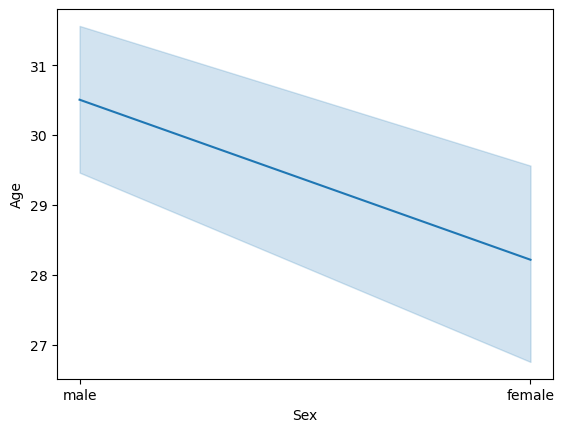

In [17]:
sns.lineplot(x='Sex', y='Age', data = df_t)
plt.show()
# there were a loty of men and they were older than the females

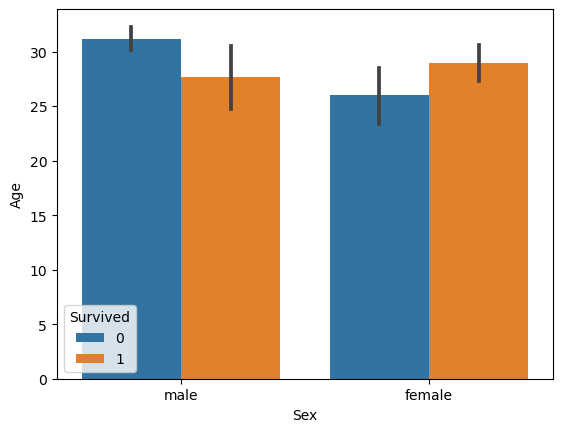

In [18]:
sns.barplot(x='Sex',y='Age', data=df_t, 
            hue='Survived')
 
plt.show()

In [19]:
# drop unwanted variables
df_t.drop(['Cabin','Ticket','Name'],axis=1, inplace=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Encode categorical variables
le = LabelEncoder()

In [22]:
df_t['Sex'] = le.fit_transform(df_t['Sex'])
df_t['Embarked'] = le.fit_transform(df_t['Embarked'])

In [23]:
# Perform Feature scaling to improve model performance
scaler = StandardScaler()

In [24]:
df_t[['Age', 'Fare']] = scaler.fit_transform(df_t[['Age', 'Fare']])

In [25]:
df_t

C:\Users\HP\anaconda3\Lib\site-packages\lux\executor\PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
C:\Users\HP\anaconda3\Lib\site-packages\lux\executor\PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
C:\Users\HP\anaconda3\Lib\site-packages\lux\executor\PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
C:\Users\HP\anaconda3\Lib\site-packages\lux\executor\PandasExecutor.py:567: UserWarning:Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [26]:
# Explain fearures
X = df_t.drop('Survived', axis=1)
y = df_t['Survived']

In [27]:
# We will use 80 percent of the data to predict in order to help as prevent over fitting and acqure optimal model  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Random Forest and Logistic Regression for prediction

In [28]:
# We perform random forest first
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [29]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Making predictions
rf_predictions = rf_model.predict(X_test)

In [31]:
# We perform logistic Regression
lr_model = LogisticRegression(max_iter=200)

In [32]:
# Train the model
lr_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(max_iter=200)

In [33]:
# Making predictions
lr_predictions = lr_model.predict(X_test)

# Model Evaluation

In [34]:
# Random forest Evaluation
print('------------------------------------------------------------')
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print('------------------------------------------------------------')

------------------------------------------------------------
Random Forest Accuracy: 0.8212290502793296
[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

------------------------------------------------------------


In [35]:
# Logistic Regression Evaluation
print('------------------------------------------------------------')
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print('------------------------------------------------------------')

------------------------------------------------------------
Logistic Regression Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

------------------------------------------------------------


- Random forest has the better score for predicting passengers who survived than logistic regression although both model hace a accuracy survival score above 80(Random forset = .82 and logistic regression = .81). The result is not suprising as random forest perform better than logistic regression. Both models predicted almost similar number of survivors and non-survivors however, random forest has slightly fewer false positives (13 vs. 15) and slightly more false negatives (20 vs. 19) than logistic regression. Random forest correctly identifies more non-survivors (92 vs. 90) but slightly fewer survivors (54 vs. 55) compared to logistic regression.

- Precision shows how many of the survivors were predicted correctly and in this case random forest performed well with a score of .81 whiles logistic regression had a score of .79
- Recal shows us how actual survivors were correctly identified with random forest having a better score than logidtic regrerssion.
- F1 score provides a single metric that balances both models effectiveness in predicting or identifying survivors
I will use cross validation to see if there will be a change in the results.

# Perform Cross validation

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
# Perform cross validation with stratification
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
# Random fores stratification
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
# Cross validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

In [40]:
print('-------------------------------------------------------------------------')
print("Random Forest Cross-Validation Accuracy Scores:", rf_cv_scores)
print("Mean Random Forest CV Accuracy:", rf_cv_scores.mean())
print("Random Forest CV Standard Deviation:", rf_cv_scores.std())
print('-------------------------------------------------------------------------')

-------------------------------------------------------------------------
Random Forest Cross-Validation Accuracy Scores: [0.87709497 0.80337079 0.80337079 0.82022472 0.86516854]
Mean Random Forest CV Accuracy: 0.8338459607055426
Random Forest CV Standard Deviation: 0.031287670484328255
-------------------------------------------------------------------------


In [41]:
# Logistic Regression stratification
lr_model = LogisticRegression(max_iter=200, random_state=42)

In [42]:
# Cross validation
lr_cv_scores = cross_val_score(lr_model, X, y, cv=skf, scoring='accuracy')

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [43]:
print('-------------------------------------------------------------------------')
print("Logistic Regression Cross-Validation Accuracy Scores:", lr_cv_scores)
print("Mean Logistic Regression CV Accuracy:", lr_cv_scores.mean())
print("Logistic Regression CV Standard Deviation:", lr_cv_scores.std())
print('-------------------------------------------------------------------------')

-------------------------------------------------------------------------
Logistic Regression Cross-Validation Accuracy Scores: [0.76536313 0.80337079 0.79213483 0.78089888 0.8258427 ]
Mean Logistic Regression CV Accuracy: 0.7935220639005712
Logistic Regression CV Standard Deviation: 0.02047347335906222
-------------------------------------------------------------------------


- From the mean and standard deviation Random forest has a better prediction than logistic regression for passengers that survived.

# Saving survived passengers to csv

In [44]:
# predictions
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [45]:
print("Number of predictions:", len(rf_predictions))

Number of predictions: 179


In [46]:
# create new column for prediction
X_test['Survived'] = rf_predictions

In [47]:
# passengers who survived
output = X_test[['PassengerId', 'Survived']]

In [48]:
# save to csv
output.to_csv('rf_gender_submission.csv',index=False)

In [49]:
print("The list of passengers with survival predictions has been saved to 'rf_gender_submission.csv'")

The list of passengers with survival predictions has been saved to 'rf_gender_submission.csv'
